In [6]:
import pandas as pd
from scikitplot.metrics import plot_roc, plot_roc_curve
from sklearn.preprocessing import LabelEncoder
import numpy as np
import scikitplot as skplt#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
import time
import sys
import qgrid #Este paquete toca instalarlo o f
sys.path.append('..')
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier #esta parcera toca instalarla pip install xgboost
from funciones import classification_error,grafica_roc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
df=pd.read_csv('../../CSV ready to model/withoutPCA_minmax.csv')

In [7]:
le=LabelEncoder()
df['GRAVEDAD']=df.loc[:,['GRAVEDAD']].apply(le.fit_transform)
y=df['GRAVEDAD']
x=df.drop(['GRAVEDAD','PERIODO'],axis=1)

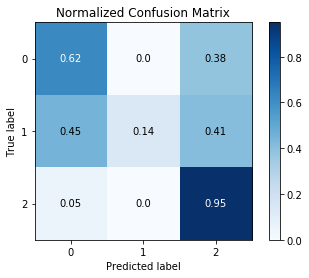

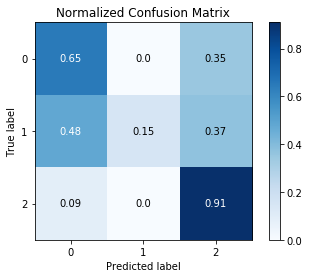

In [3]:
ABC = AdaBoostClassifier(n_estimators=5)
RF = RandomForestClassifier(n_estimators=100, max_features =5, n_jobs = -1)
XG = XGBClassifier(n_estimators=100, max_features =6, n_jobs = -1)

vc1 = VotingClassifier(estimators=[('ABC', ABC), ('rf', RF),('xg', XG)], voting='hard',n_jobs=-1)
vc2 = VotingClassifier(estimators=[('ABC', ABC), ('rf', RF),('xg', XG)], voting='soft',n_jobs=-1)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25)
                                                
vc1.fit(Xtrain,Ytrain)
vc2.fit(Xtrain,Ytrain)

pred1=vc1.predict(Xtest)
pred2=vc2.predict(Xtest)

skplt.metrics.plot_confusion_matrix(Ytest, pred1,normalize=True)
skplt.metrics.plot_confusion_matrix(Ytest, pred2,normalize=True)

In [8]:
def model_VC(x,y, impresion = False):

    tiempo_i = time.time()
    accuracy_list = np.zeros([4])
    precision_list = np.zeros([4,3])
    recall_list = np.zeros([4,3])
    f_list = np.zeros([4,3])
    errores = np.zeros(4)
    ABC = AdaBoostClassifier(n_estimators=5)
    RF = RandomForestClassifier(n_estimators=100, max_features =5, n_jobs = -1)
    XG = XGBClassifier(n_estimators=100, max_features =8, n_jobs = -1)
    vc = VotingClassifier(estimators=[('ABC', ABC), ('rf', RF),('xg', XG)], voting='soft',n_jobs=-1)
    for j in range(4):
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.25) # Modificar metodología de validación

        vc.fit(Xtrain, Ytrain)
        pred = vc.predict(Xtest)

        #code for calculating accuracy
        _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
        accuracy_list[j] = _accuracy_

        #code for calculating recall
        _recalls_ = recall_score(Ytest, pred, average=None)
        recall_list[j] = _recalls_

        #code for calculating precision
        _precisions_ = precision_score(Ytest, pred, average=None)
        precision_list[j] = _precisions_

        _f_score_ = f1_score(Ytest, pred, average=None)
        f_list[j] = _f_score_


        errores[j] = classification_error(pred, Ytest)


    if impresion == True:
        skplt.metrics.plot_confusion_matrix(Ytest, pred)
        grafica_roc(model=vc,Xtest=Xtest,Ytest=Ytest)

    result={'Eficiencia':np.mean(accuracy_list),'Int_Eficiencia':np.std(accuracy_list),
        'Sensibilidad':np.mean(recall_list),'Int_Sensibilidad':np.std(recall_list),
        'Precisión':np.mean(precision_list),'Int Precisión':np.std(precision_list),
        'F':np.mean(f_list),'Int_F':np.std(f_list),
        'Error':np.mean(errores),'Int_Error':np.std(errores),
        'Tiempo':time.time()-tiempo_i
        }
    return  result

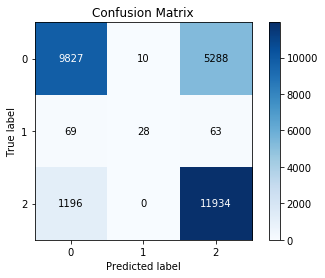

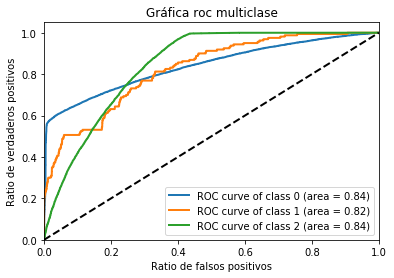

In [9]:
result=model_VC(x,y,impresion = True)

In [10]:
print(result)

{'Eficiencia': 0.7666109449234558, 'Int_Eficiencia': 0.001150745475423242, 'Sensibilidad': 0.5825211293946176, 'Int_Sensibilidad': 0.2971382475581584, 'Precisión': 0.8159027832993414, 'Int Precisión': 0.11001812979083198, 'F': 0.6149902253134711, 'Int_F': 0.21614821595770967, 'Error': 0.2333890550765441, 'Int_Error': 0.0011507454754232501, 'Tiempo': 81.64761590957642}
